In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('bhp.csv')
data.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [2]:
data.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

In [3]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
min_threshold, max_threshold = data.price.quantile([0.001,0.999])

In [5]:
min_threshold

11.5

In [6]:
max_threshold

2000.0

In [7]:
data[data.price<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
169,Attibele,1 BHK,450.0,1.0,11.00,1,2444
928,Attibele,1 BHK,400.0,1.0,11.00,1,2750
1452,Kengeri,1 BHK,340.0,1.0,10.00,1,2941
2408,Attibele,1 BHK,395.0,1.0,10.25,1,2594
5360,Attibele,1 BHK,400.0,1.0,10.00,1,2500
7403,other,1 BHK,470.0,2.0,10.00,1,2127
8501,Chandapura,1 BHK,450.0,1.0,9.00,1,2000
8560,Doddaballapur,2 Bedroom,640.0,1.0,10.50,2,1640
10422,Yelahanka New Town,1 BHK,284.0,1.0,8.00,1,2816
10983,Attibele,1 BHK,410.0,1.0,10.00,1,2439


In [9]:
data=data[data.price>=min_threshold]

In [10]:
data[data.price>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
404,Rajaji Nagar,7 BHK,12000.0,6.0,2200.0,7,18333
598,Malleshwaram,7 BHK,12000.0,7.0,2200.0,7,18333
2592,other,4 Bedroom,30000.0,4.0,2100.0,4,7000
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
10203,other,4 Bedroom,10624.0,4.0,2340.0,4,22025
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770


In [11]:
data=data[data.price<=max_threshold]

In [12]:
data.shape

(13175, 7)

In [13]:
data[data.price>(data.price.mean()+4*data.price.std())]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
61,Whitefield,4 Bedroom,5700.00,5.0,650.0,4,11403
157,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,760.0,4,20266
435,Whitefield,4 Bedroom,11890.00,4.0,700.0,4,5887
634,other,3 Bedroom,4000.00,3.0,660.0,3,16500
733,Cunningham Road,4 BHK,5270.00,4.0,1250.0,4,23719
...,...,...,...,...,...,...,...
12777,other,5 BHK,4000.00,5.0,680.0,5,17000
12868,other,6 Bedroom,30400.00,4.0,1824.0,6,6000
12967,other,5 BHK,5665.84,7.0,988.0,5,17437
12976,other,4 BHK,6652.00,6.0,660.0,4,9921


In [14]:
data=data[data.price<=(data.price.mean()+4*data.price.std())]

In [16]:
data[data.price<(data.price.mean()-4*data.price.std())]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [17]:
data.price.max()

615.0

Text(0, 0.5, 'Count')

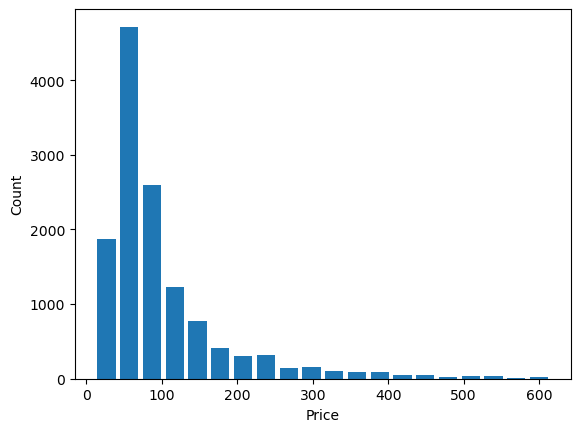

In [25]:
import matplotlib.pyplot as plt
plt.hist(data.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')